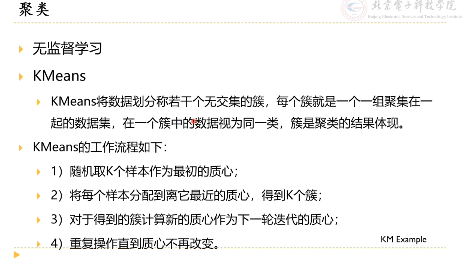

In [9]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

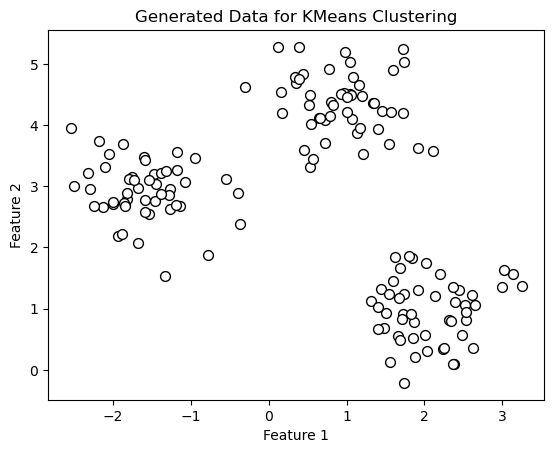

In [17]:
# 生成测试数据
X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, random_state=0,shuffle=True)

# 可视化生成的数据
plt.scatter(X[:, 0], X[:, 1], c='white',marker='o', edgecolor='black',  s=50)
plt.title("Generated Data for KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


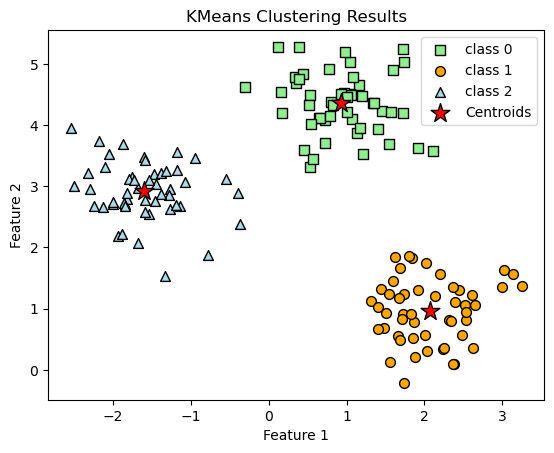

In [18]:
# 定义KMeans模型
kmeans = KMeans(n_clusters=3, random_state=42)

# 使用数据进行训练
kmeans.fit(X)

# 预测数据的聚类标签
y_pred = kmeans.predict(X)

# 绘制预测结果
#plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', marker='o', edgecolor='black', s=50)
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], c='lightgreen', marker='s', edgecolor='black', s=50, label='class 0')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c='orange',  marker='o', edgecolor='black', s=50, label='class 1')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], c='lightblue',  marker='^', edgecolor='black', s=50, label='class 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='*', edgecolor='black', s=200, label='Centroids')
plt.title("KMeans Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 设置画布
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# 添加文字
text = ax.text(5, 8, "Happy Birthday!", fontsize=24, color='purple', ha='center', va='center', alpha=0)

# 气球数据
num_balloons = 20
balloons = {
    "x": np.random.uniform(1, 9, num_balloons),
    "y": np.random.uniform(0, 2, num_balloons),
    "colors": np.random.choice(['red', 'blue', 'green', 'yellow', 'pink', 'orange'], num_balloons),
    "sizes": np.random.uniform(50, 200, num_balloons),
    "speeds": np.random.uniform(0.02, 0.1, num_balloons)
}
scat = ax.scatter(balloons["x"], balloons["y"], s=balloons["sizes"], c=balloons["colors"], alpha=0.6)

# 更新函数
def update(frame):
    # 让文字逐渐出现
    if frame < 30:
        text.set_alpha(frame / 30)
    # 气球上升
    balloons["y"] += balloons["speeds"]
    balloons["y"] = np.where(balloons["y"] > 10, 0, balloons["y"])  # 循环回到底部
    scat.set_offsets(np.c_[balloons["x"], balloons["y"]])

# 动画
ani = animation.FuncAnimation(fig, update, frames=200, interval=50)

# 保存或展示动画
plt.show()